## Find start and end time of recording for each system

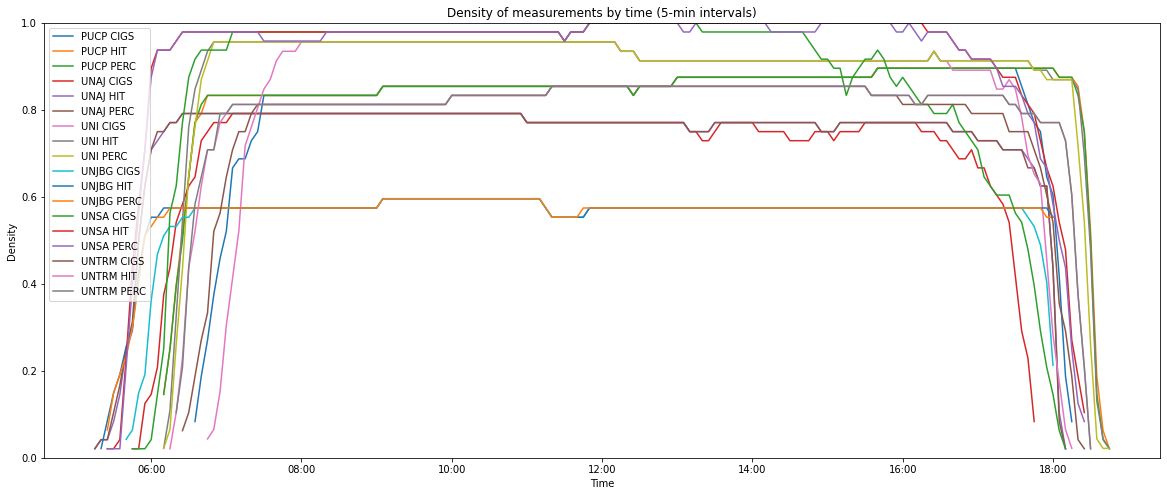

In [7]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

data_dir = Path("../data/aggregated").resolve()

system_files = data_dir.glob("*.csv")

fig,ax = plt.subplots(figsize=(20, 8))

for system_file in system_files:
    location, technology = system_file.name[:-4].split("_")

    df = pd.read_csv(system_file)

    df["datetime"] = df.date + " " + df.time
    df.datetime = pd.to_datetime(df.datetime, format="%d/%m/%Y %H:%M:%S")

    # year selection
    df = df[ (pd.to_datetime("2022-01-01") <=  df["datetime"]) & (df["datetime"] < pd.to_datetime("2023-01-01"))]

    df = df.groupby(pd.Grouper(key="datetime", freq="5min"))["p_dc"].mean()

    df = df.reset_index()

    df["time"] = df["datetime"].dt.time
    df["date"] = df["datetime"].dt.date

    # days recorded
    days = len(df["date"].unique())

    df = df.groupby("time").count()

    df.reset_index(inplace=True)

    df.rename({"p_dc": "counts"}, axis=1, inplace=True)
    df = df[["time", "counts"]]
    df["time"] = pd.to_datetime(df["time"].astype(str))

    df = df[df["counts"] > 0]
    df["counts"] = df["counts"] / days

    
    ax.plot(df["time"], df["counts"], label=f"{location} {technology}")

ax.set_ylim(0.0, 1.0)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

ax.set_xlabel("Time")
ax.set_ylabel("Density")
ax.set_title(f"Density of measurements by time (5-min intervals)")

plt.legend()

plt.show()


# Insights
- At 10:00 all systems seem to already be working with a probability of 80%
- At 08:00 almost all systems work
- Around 06:00 systems start recording
- Systems still work at 16:00
- Around 17:00 systems seem to stop measuring
- 18:00 or 19:00 systems stop recording